<a href="https://colab.research.google.com/github/akanksha0911/DL_BuildNN/blob/main/DLAssignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Building a simple fully connected deep network from scratch**
Akanksha Rawat

Non-linear equation with 3 variables - X1, X2, X3 below

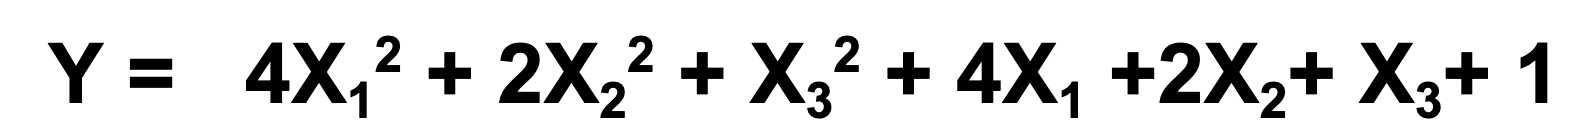

### **numpy only from scratch 3 layer deep neural network for non linear regression**




In [401]:
import numpy as np
import matplotlib.pyplot as plt

In [402]:
n = 300
d = 3
x = np.random.uniform(-1,1,(n,d))

weights = np.array([[4,2,1],]).T
bias = np.array([1])
y_true = (x ** 2) @weights + x @ weights + bias
print(f'x: {x.shape},weights: {weights.shape}, bias: {bias.shape}, y: {y_true.shape}')

x: (300, 3),weights: (3, 1), bias: (1,), y: (300, 1)


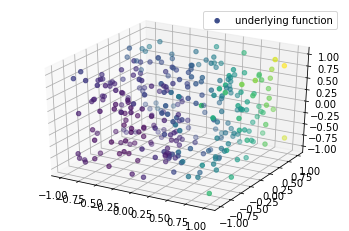

In [403]:
def plot_4d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], x[:, 2], c = y, label='underlying function')
  if y_pred is not None:
    pic = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c = y_pred, label='our function')
  plt.legend()
  plt.show()

plot_4d(x, y_true)

In [404]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

Epoch 0, loss 19.32533834629449
Epoch 1, loss 14.282928749016218
Epoch 2, loss 10.882185334958164
Epoch 3, loss 8.556498262254927
Epoch 4, loss 6.939889790997751
Epoch 5, loss 5.795216978580176
Epoch 6, loss 4.968177057116768
Epoch 7, loss 4.3578267133070225
Epoch 8, loss 3.8976726392813545
Epoch 9, loss 3.5435311475807008
Epoch 10, loss 3.2657238510365665
Epoch 11, loss 3.044052315800207
Epoch 12, loss 2.8645549638267394
Epoch 13, loss 2.7174080295573186
Epoch 14, loss 2.595561790039404
Epoch 15, loss 2.493850106318243
Epoch 16, loss 2.408405291787269
Epoch 17, loss 2.336270493565153
Epoch 18, loss 2.2751403111107757
Epoch 19, loss 2.223185070795165
Epoch 20, loss 2.1789300087277557
Epoch 21, loss 2.1411707746709467
Epoch 22, loss 2.108913197153153
Epoch 23, loss 2.081329449239604
Epoch 24, loss 2.057725461321744
Epoch 25, loss 2.0375161766161676
Epoch 26, loss 2.0202063793594016
Epoch 27, loss 2.0053755644006115
Epoch 28, loss 1.9926658007088471
Epoch 29, loss 1.9817718604731356
Epoc

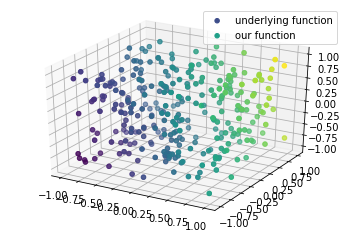

In [405]:
loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_4d(x, y_true, linear(x))

## we can see that loss is still high so our linear model is not capable of non-linearity 

In [406]:
 # In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


19.72826995106184


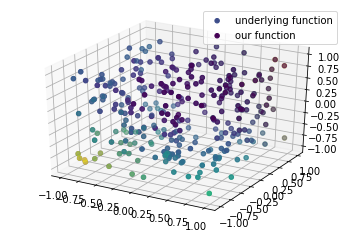

In [407]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 4)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_4d(x, y_true, y_pred)

In [408]:
# Test just one forward and backward step
loss = MSE()
model = Model(d, 4)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

27.228612943054006
16.619049545235054


Epoch 0, loss 16.619049545235054
Epoch 1, loss 13.721939612195635
Epoch 2, loss 11.839419525798276
Epoch 3, loss 10.3756271878711
Epoch 4, loss 8.999733974105872
Epoch 5, loss 7.524419077829999
Epoch 6, loss 6.018282356974288
Epoch 7, loss 4.770775550919143
Epoch 8, loss 3.9072148650792298
Epoch 9, loss 3.286181217486304
Epoch 10, loss 2.8090163110626136
Epoch 11, loss 2.423446505260556
Epoch 12, loss 2.116965908754373
Epoch 13, loss 1.882252248687968
Epoch 14, loss 1.7046204311990267
Epoch 15, loss 1.5701409537784579
Epoch 16, loss 1.4656822805390648
Epoch 17, loss 1.3848252655854567
Epoch 18, loss 1.321353136756351
Epoch 19, loss 1.271666245033044
Epoch 20, loss 1.2323482068207945
Epoch 21, loss 1.2005914992360476
Epoch 22, loss 1.1750113504763475
Epoch 23, loss 1.1544093257428016
Epoch 24, loss 1.137326066952926
Epoch 25, loss 1.1225132958552775
Epoch 26, loss 1.1087369233508002
Epoch 27, loss 1.0967113189007758
Epoch 28, loss 1.0862125187278409
Epoch 29, loss 1.0768143410856874
Epo

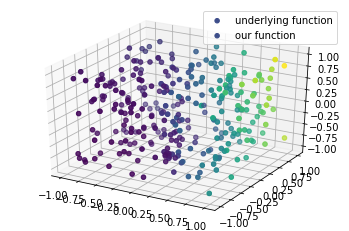

In [409]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_4d(x, y_true, model(x))

### So  we can see that the loss is decreasing and getting close to 0.

### **pytorch from scratch - 3 layer deep neural network for non linear regression**

In [410]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2



In [411]:

loss = nn.MSELoss()
model = TorchModel(d, 4)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(18.1407, grad_fn=<MseLossBackward0>)


In [412]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(18.1407, grad_fn=<MseLossBackward0>)
tensor(11.0313, grad_fn=<MseLossBackward0>)


tensor(11.0313, grad_fn=<MseLossBackward0>)
tensor(5.6613, grad_fn=<MseLossBackward0>)
tensor(3.5500, grad_fn=<MseLossBackward0>)
tensor(2.6549, grad_fn=<MseLossBackward0>)
tensor(2.1456, grad_fn=<MseLossBackward0>)
tensor(1.8424, grad_fn=<MseLossBackward0>)
tensor(1.6497, grad_fn=<MseLossBackward0>)
tensor(1.5269, grad_fn=<MseLossBackward0>)
tensor(1.4449, grad_fn=<MseLossBackward0>)
tensor(1.3874, grad_fn=<MseLossBackward0>)
tensor(1.3442, grad_fn=<MseLossBackward0>)
tensor(1.2994, grad_fn=<MseLossBackward0>)
tensor(1.2611, grad_fn=<MseLossBackward0>)
tensor(1.2258, grad_fn=<MseLossBackward0>)
tensor(1.1949, grad_fn=<MseLossBackward0>)
tensor(1.1673, grad_fn=<MseLossBackward0>)
tensor(1.1434, grad_fn=<MseLossBackward0>)
tensor(1.1200, grad_fn=<MseLossBackward0>)
tensor(1.0953, grad_fn=<MseLossBackward0>)
tensor(1.0708, grad_fn=<MseLossBackward0>)
tensor(1.0437, grad_fn=<MseLossBackward0>)
tensor(1.0176, grad_fn=<MseLossBackward0>)
tensor(0.9906, grad_fn=<MseLossBackward0>)
tensor(0.9

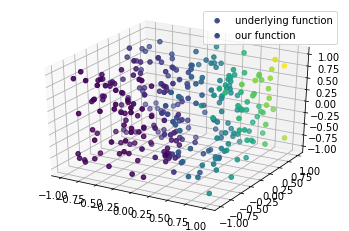

In [413]:
# Now we run the training loop

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_4d(x, y_true, model(x_tensor).detach())

## **Using pytorch builtin functionality of modules**

In [414]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [415]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [416]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)


In [417]:
# Hyperparameters for our network

# Build a feed-forward network
model = nn.Sequential(nn.Linear(3, 10),
                      nn.ReLU(),
                      nn.Linear(10, 1),
                      nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=3, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
  (3): Softmax(dim=1)
)


In [418]:
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()

logits = model(x_tensor)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)

loss_value = loss(y_pred, y_true_tensor)
print(loss_value)

tensor(21.1377)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([300, 1])) that is different to the input size (torch.Size([300])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


## **pytorch lightening version of the same**

In [419]:
%%capture
! pip install git+https://github.com/PytorchLightning/pytorch-lightning.git@master --upgrade

In [420]:
x_train = x[: n // 2]
x_test = x[n // 2 :]
y_train = y_true[: n // 2]
y_test = y_true[n // 2 :]

In [421]:
from torch.utils.data import TensorDataset, DataLoader

x_train_t = torch.Tensor(x_train[:, np.newaxis])
y_train_t = torch.Tensor(y_train[:, np.newaxis])
x_test_t = torch.Tensor(x_test[:, np.newaxis])
y_test_t = torch.Tensor(y_test[:, np.newaxis])

dataset_train = TensorDataset(x_train_t, y_train_t)
dataloader_train = DataLoader(dataset_train, batch_size=64, shuffle=True)
dataset_test = TensorDataset(x_test_t, y_test_t)
dataloader_test = DataLoader(dataset_test, batch_size=64, shuffle=True)

In [422]:
def loss_fn_loglike(y_hat, y):
    negloglik = -y_hat.log_prob(y)
    return torch.mean(negloglik)


def plot_loss(loss_train, loss_test):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(np.array(loss_train), label="Train loss")
    ax.plot(np.array(loss_test), label="Test loss")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("NegLogLike")
    ax.set_title("Training Overview")
    ax.legend()

    plt.show()


def plot_results(x, y, y_est_mu, y_est_std=None):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, ".", label="y")
    plt.plot(x, y_est_mu, "-y", label="y_est_mu")
    if y_est_std is not None:
        plt.plot(x, y_est_mu + 2 * y_est_std, "-r", label="mu+2std")
        plt.plot(x, y_est_mu - 2 * y_est_std, "-r", label="mu-2std")
    plt.legend()
    plt.show()


def plot_model_results(model, x, y):
    si = np.argsort(x)
    x = x[si]
    y = y[si]
    y_hat = model(torch.Tensor(x[:, np.newaxis]))
    y_est_mu = y_hat.mean.detach().numpy()
    y_est_std = y_hat.scale.detach().numpy()
    plot_results(x, y, y_est_mu, y_est_std)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:97: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=20)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  f"Setting `Trainer(progress_bar_refresh_rate={progress_bar_refresh_rate})` is deprecated in v1.5 and"
GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1796: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  category=PossibleUserWarning,
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator

Training: 0it [00:00, ?it/s]

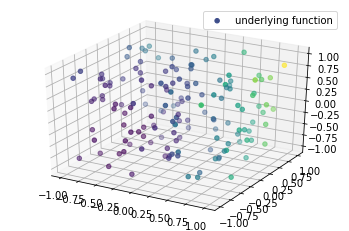

In [423]:
import pytorch_lightning as pl

class DeepNormalModelPL(pl.LightningModule):
    def __init__(self, n_inputs: int = 3, n_hidden: int = 10, learning_rate=0.05):
        super().__init__()

        self.learning_rate = learning_rate
        self.hidden = torch.nn.Linear(n_inputs, n_hidden)
        self.mean_linear = torch.nn.Linear(n_hidden, 1)
        self.scale_linear = torch.nn.Linear(n_hidden, 1)

    def forward(self, x):
        outputs = self.hidden(x)
        # outputs = torch.relu(outputs)
        outputs = torch.sigmoid(outputs)

        mean = self.mean_linear(outputs)
        scale = torch.nn.functional.softplus(self.scale_linear(outputs))

        return torch.distributions.Normal(mean, scale)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = loss_fn_loglike(y_hat, y)
        return loss


model_lightning = DeepNormalModelPL()
trainer = pl.Trainer(max_epochs=40, progress_bar_refresh_rate=20)
trainer.fit(model_lightning, dataloader_train, dataloader_test)
y_hat = model_lightning(torch.Tensor(x[:, np.newaxis]))
plot_4d(x_train, y_train)
#plot_model_results(model_lightning, x_train, y_train)

## **Tensorflow various variants**

## **1. High Level API**

In [424]:
import tensorflow as tf
from tensorflow import keras

In [425]:
n = 300
d = 3
x = np.random.uniform(-1,1,(n,d))

weights = np.array([[4,2,1],]).T
bias = np.array([1])
y_true = (x ** 2) @weights + x @ weights + bias
print(f'x: {x.shape},weights: {weights.shape}, bias: {bias.shape}, y: {y_true.shape}')

x: (300, 3),weights: (3, 1), bias: (1,), y: (300, 1)


Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_1 (Dense)             (None, 10)                40        
                                                                 
 regression (Dense)          (None, 1)                 11        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
10/10 [==============================] - 1s 3ms/step - loss: 5.2252
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8802
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5324
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4279
Epoch

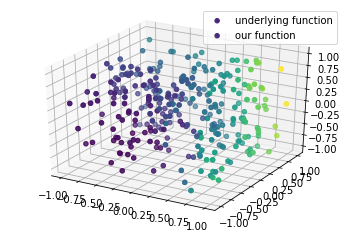

In [426]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(3,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_4d(x, y_true, model(x))

# **2.From Scratch using classes**
# **3.equivalent Low Level API**

Creating layers by subclassing the Layer class

Computing gradients with a GradientTape and writing low-level training loops

Tracking losses created by layers via the add_loss() method

Tracking metrics in a low-level training loop


In [427]:
n = 300
d = 3
x = np.random.uniform(-1,1,(n,d))

weights = np.array([[4,2,1],]).T
bias = np.array([1])
y_true = (x ** 2) @weights + x @ weights + bias
print(f'x: {x.shape},weights: {weights.shape}, bias: {bias.shape}, y: {y_true.shape}')

x: (300, 3),weights: (3, 1), bias: (1,), y: (300, 1)


In [428]:
#A simple layer looks like this

class Linear(keras.layers.Layer):
  """y = w.x + b"""

  def __init__(self, units=10, input_dim=3):
      super(Linear, self).__init__()
      w_init = tf.random_normal_initializer()
      self.w = tf.Variable(
          initial_value=w_init(shape=(input_dim, units), dtype='float32'),
          trainable=True)
      b_init = tf.zeros_initializer()
      self.b = tf.Variable(
          initial_value=b_init(shape=(units,), dtype='float32'),
          trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b

In [429]:
# Instantiate our layer.
linear_layer = Linear(units=10, input_dim=3)

# The layer can be treated as a function.
# Here we call it on some data.
y = linear_layer(x)
y.shape


TensorShape([300, 10])

creating add_weight method for creating weights

In [430]:
class Linear(keras.layers.Layer):
  """y = w.x + b"""

  def __init__(self, units=32):
      super(Linear, self).__init__()
      self.units = units

  def build(self, input_shape):
      self.w = self.add_weight(shape=(input_shape[-1], self.units),
                               initializer='random_normal',
                               trainable=True)
      self.b = self.add_weight(shape=(self.units,),
                               initializer='random_normal',
                               trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b


# Instantiate our lazy layer.
linear_layer = Linear(10)

# This will also call `build(input_shape)` and create the weights.
y = linear_layer(x)


In [431]:
x.shape

(300, 3)

In [432]:

dataset = tf.data.Dataset.from_tensor_slices(
    (x, y_true))
dataset = dataset.shuffle(buffer_size=100).batch(64)

In [433]:
# Instantiate our linear layer (defined above) with 10 units.
linear_layer = Linear(10)

# Instantiate a logistic loss function that expects integer targets.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

# Iterate over the batches of the dataset.
for step, (x, y) in enumerate(dataset):
  
  # Open a GradientTape.
  with tf.GradientTape() as tape:

    # Forward pass.
    logits = linear_layer(x)

    # Loss value for this batch.
    loss = loss_fn(y, logits)
     
  # Get gradients of weights wrt the loss.
  gradients = tape.gradient(loss, linear_layer.trainable_weights)
  
  # Update the weights of our linear layer.
  optimizer.apply_gradients(zip(gradients, linear_layer.trainable_weights))


In [434]:
class MLP(keras.layers.Layer):
    """Simple stack of Linear layers."""
    def __init__(self):
        super(MLP, self).__init__()
        self.linear_1 = Linear(10)
        self.linear_2 = Linear(1)
        

    def call(self, inputs):
        l1 = self.linear_1(inputs)
        r = tf.nn.relu(x)
        l2 = self.linear_2(x)
        return l2


mlp = MLP()

# The first call to the `mlp` object will create the weights.
y_pred = mlp(x)

above created manual class is equivalent to 

mlp = keras.Sequential([keras.layers.Dense(32, activation=tf.nn.relu),
                        keras.layers.Dense(10)])


---



Layers can create losses during the forward pass via the add_loss() method. This is especially useful for regularization losses. The losses created by sublayers are recursively tracked by the parent layers.

Here's a layer that creates an activity regularization loss:

In [435]:
class ActivityRegularization(keras.layers.Layer):
  """Layer that creates an activity sparsity regularization loss."""
  
  def __init__(self, rate=1e-2):
    super(ActivityRegularization, self).__init__()
    self.rate = rate
  
  def call(self, inputs):
    # We use `add_loss` to create a regularization loss
    # that depends on the inputs.
    self.add_loss(self.rate * tf.reduce_sum(inputs))
    return inputs

In [436]:
# Let's use the loss layer in a MLP block.
from tensorflow.keras import layers

class SparseMLP(Layer):
  """Stack of Linear layers with a sparsity regularization loss."""

  def __init__(self, output_dim):
      super(SparseMLP, self).__init__()
      self.dense_1 = layers.Dense(10, activation=tf.nn.relu)
      self.regularization = ActivityRegularization(1e-2)
      self.dense_2 = layers.Dense(1)

  def call(self, inputs):
      x = self.dense_1(inputs)
      x = self.regularization(x)
      return self.dense_2(x)
    

mlp = SparseMLP(1)
y_pred = mlp(x)


print(mlp.losses)  # List containing one float32 scalar

[<tf.Tensor: shape=(), dtype=float32, numpy=0.65334594>]


In [437]:
# Let's demonstrate how to use these losses in a training loop.


# A new MLP.
mlp = SparseMLP(1)

# Loss and optimizer.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

for step, (x, y) in enumerate(dataset):
  with tf.GradientTape() as tape:
    # Forward pass.
    logits = mlp(x)

    # External loss value for this batch.
    loss = loss_fn(y, logits)
    
    # Add the losses created during the forward pass.
    loss += sum(mlp.losses)
     
    # Get gradients of loss wrt the weights.
    gradients = tape.gradient(loss, mlp.trainable_weights)
  
  # Update the weights of our linear layer.
  optimizer.apply_gradients(zip(gradients, mlp.trainable_weights))
  # Logging.
  if step % 100 == 0:
    print('Loss at step %d: %.3f' % (step, loss))
  

Loss at step 0: nan


In [438]:
# Instantiate a metric object
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()


# Prepare our layer, loss, and optimizer.
model = keras.Sequential([keras.layers.Dense(10, activation='relu'),
                          keras.layers.Dense(1)])
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

for epoch in range(2):
    # Iterate over the batches of a dataset.
    for step, (x, y) in enumerate(dataset):
        with tf.GradientTape() as tape:
            logits = model(x)
            # Compute the loss value for this batch.
            loss_value = loss_fn(y, logits)

        # Update the state of the `accuracy` metric.
        accuracy.update_state(y, logits)

        # Update the weights of the model to minimize the loss value.
        gradients = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))

        # Logging the current accuracy value so far.
        if step % 100 == 0:
            print('Epoch:', epoch, 'Step:', step)        
            print('Total running accuracy so far: %.3f' % accuracy.result())

    # Result the metric's state at the end of an epoch
    accuracy.reset_states()

Epoch: 0 Step: 0
Total running accuracy so far: 0.000
Epoch: 1 Step: 0
Total running accuracy so far: 0.000


## **4.Using built-in training loops**

In [439]:
from tensorflow.keras.layers import Layer

class Dropout(Layer):
  
  def __init__(self, rate):
    super(Dropout, self).__init__()
    self.rate = rate

  def call(self, inputs, training=None):
    if training:
      return tf.nn.dropout(inputs, rate=self.rate)
    return inputs

class MLPWithDropout(Layer):

  def __init__(self):
      super(MLPWithDropout, self).__init__()
      self.linear_1 = Linear(10)
      self.dropout = Dropout(0.5)
      self.linear_3 = Linear(1)

  def call(self, inputs, training=None):
      x = self.linear_1(inputs)
      x = tf.nn.relu(x)
      x = self.dropout(x, training=training)
      return self.linear_3(x)
    
mlp = MLPWithDropout()
y_pred = mlp(x, training=True)

In [440]:
from tensorflow.keras import Sequential

model = Sequential([Linear(10), Dropout(0.5), Linear(1)])

y_ten = model(tf.ones((2, 16)))


In [441]:


# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(10, activation=tf.nn.relu),
  layers.Dense(1)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

In [442]:
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

In [443]:
model.fit(dataset, epochs=3)

Epoch 1/3
5/5 [==============================] - 1s 8ms/step - loss: nan - sparse_categorical_accuracy: 0.0000e+00
Epoch 2/3
5/5 [==============================] - 0s 4ms/step - loss: nan - sparse_categorical_accuracy: 0.0000e+00
Epoch 3/3
5/5 [==============================] - 0s 6ms/step - loss: nan - sparse_categorical_accuracy: 0.0000e+00


In [444]:
n = 300
d = 3
x = np.random.uniform(-1,1,(n,d))

weights = np.array([[4,2,1],]).T
bias = np.array([1])
y_true = (x ** 2) @weights + x @ weights + bias
print(f'x: {x.shape},weights: {weights.shape}, bias: {bias.shape}, y: {y_true.shape}')

x: (300, 3),weights: (3, 1), bias: (1,), y: (300, 1)


In [445]:
# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(10, activation=tf.nn.relu),
  layers.Dense(1)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[accuracy])

# Instantiate some callbacks
callbacks = [tf.keras.callbacks.EarlyStopping(),
             tf.keras.callbacks.ModelCheckpoint(filepath='my_model.keras',
                                                save_best_only=True)]

model.fit(x, y_true,
          epochs=3,
          batch_size=64,
          callbacks=callbacks)

Epoch 1/3
5/5 [==============================] - 1s 8ms/step - loss: nan - sparse_categorical_accuracy: 0.0000e+00
Epoch 2/3
5/5 [==============================] - 0s 10ms/step - loss: nan - sparse_categorical_accuracy: 0.0000e+00
Epoch 3/3
5/5 [==============================] - 0s 11ms/step - loss: nan - sparse_categorical_accuracy: 0.0000e+00


Callbacks

A callback is an object that is called at different points during training (e.g. at the end of every batch or at the end of every epoch) and takes actions, such as saving a model, mutating variables on the model, loading a checkpoint, stopping training, etc.

There's a bunch of built-in callback available, like ModelCheckpoint to save your models after each epoch during training, or EarlyStopping, which interrupts training when your validation metrics start stalling.